#Proyek Pertama
#Nama : Lalu Ardita Arip
#SIB ID : M302X0788
#Email : ardita.arip18@gmail.com
#Email :M302X0788@dicoding.org
#alamat : Lombok Timur, NTB
#kode kelas : M-08

link dataset :https://www.kaggle.com/code/nezarabdilahprakasa/big-data-analysis-using-pysprak-movie-recommed/data?select=tags.csv

melakukan loading data agar data lebih mudah diproses

In [93]:
import pandas as pd
import numpy as np 
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

print('Jumlah data link  : ', len(links.movieId.unique()))
print('Jumlah data movie : ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.userId.unique()))
print('Jumlah data ratings dari movie : ', len(ratings.movieId.unique()))
print('Jumlah data tags : ', len(tags.movieId.unique()))

Jumlah data link  :  9125
Jumlah data movie :  9125
Jumlah data ratings dari user :  671
Jumlah data ratings dari movie :  9066
Jumlah data tags :  689


membaca data dengan fungsi pandas.read_csv 

In [95]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


melakukan eksplorasi terhadap variabel links yang merupakan daftar link movie.

In [96]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


melakukan eksplorasi terhadap variabel movie yang merupakan daftar link movie.

In [97]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


melakukan eksplorasi terhadap variabel rating yang merupakan daftar link movie.

In [98]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     1296 non-null   int64 
 1   movieId    1296 non-null   int64 
 2   tag        1296 non-null   object
 3   timestamp  1296 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


melakukan eksplorasi terhadap variabel tags yang merupakan daftar link movie.

In [99]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


mengecek nilai dari data rating

In [100]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


diketahui bahwa nilai max adalah 5 dan min 0.5 sehingga dapat dibuat sekal anatar 0.5 sampai 5

In [101]:
film = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))
film = np.sort(np.unique(film)) 
print('Jumlah data seluruh film berdasarkan movieID: ', len(film))

Jumlah data seluruh film berdasarkan movieID:  9125


menggabungkan file-file dengan menggunakan fungsi concatenate dari movieId menjadi satu dalam variabel film

In [102]:
user = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
))
user = np.sort(np.unique(user)) 
print('Jumlah data seluruh user: ', len(user))

Jumlah data seluruh user:  671


menggabungkan file-file dengan menggunakan fungsi concatenate dari userId menjadi satu dalam variabel user

In [103]:
info_film = pd.concat([links, movies, ratings, tags])
film = pd.merge(ratings, info_film , on='movieId', how='left')
film

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,31,2.5,1260759144,112792.0,9909.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,31,2.5,1260759144,NaN,NaN,Dangerous Minds (1995),Drama,NaN,NaN,NaN,NaN
2,1,31,2.5,1260759144,NaN,NaN,NaN,NaN,1.0,2.5,1.260759e+09,NaN
3,1,31,2.5,1260759144,NaN,NaN,NaN,NaN,7.0,3.0,8.518688e+08,NaN
4,1,31,2.5,1260759144,NaN,NaN,NaN,NaN,31.0,4.0,1.273542e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6609806,671,6565,3.5,1074784724,NaN,NaN,NaN,NaN,509.0,4.0,1.093278e+09,NaN
6609807,671,6565,3.5,1074784724,NaN,NaN,NaN,NaN,529.0,2.5,1.062034e+09,NaN
6609808,671,6565,3.5,1074784724,NaN,NaN,NaN,NaN,580.0,3.5,1.165901e+09,NaN
6609809,671,6565,3.5,1074784724,NaN,NaN,NaN,NaN,654.0,4.5,1.145391e+09,NaN


file links, movies, ratings dan tags digabungkan kedalam dataframe info_film, serta menggabungkan dataframe rating dan info_film.

In [104]:
film.isnull().sum()

userId_x             0
movieId              0
rating_x             0
timestamp_x          0
imdbId         6509807
tmdbId         6509878
title          6509807
genres         6509807
userId_y        200008
rating_y        263133
timestamp_y     200008
tag            6546686
dtype: int64

mengecek missing value

In [105]:
film.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,userId_y,rating_y,timestamp_y
movieId,,,,,,,,
1,20906000,239125.0,68117429794500,28333123.0,212914.0,20778875.0,236255.5,6.761938e+13
2,3719407,39676.0,12471487698406,12144179.0,946308.0,3651161.0,38948.0,1.224265e+13
3,1347551,11376.5,3477508189719,6680452.0,920518.0,1303369.0,11003.5,3.363492e+12
4,69330,465.0,180917035830,1493505.0,407641.0,60086.0,403.0,1.567948e+11
5,1059876,10797.0,3293163175649,6330296.0,664272.0,1030120.0,10248.0,3.189580e+12
...,...,...,...,...,...,...,...,...
161944,861,15.0,4410503472,255313.0,159550.0,287.0,5.0,1.470168e+09
162376,219,13.5,4422766596,4574334.0,410612.0,73.0,4.5,1.474256e+09
162542,1833,15.0,4414562001,5165344.0,392572.0,611.0,5.0,1.471521e+09


menggabungkan beberapa rating berdasakan movieId

In [106]:
film_rate = ratings
film_rate

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


membuat variabel film_rate dengan definisi ratings

In [107]:
film_name = pd.merge(film_rate, movies[['movieId','title','genres']], on='movieId', how='left')
film_name

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance
100000,671,6269,4.0,1065149201,Stevie (2002),Documentary
100001,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
100002,671,6385,2.5,1070979663,Whale Rider (2002),Drama


menggabungkan film_rate dengan variabel ratings

In [108]:
Sfilm = pd.merge(film_name, tags[['movieId','tag']], on='movieId', how='left')
Sfilm

,userId,movieId,rating,timestamp,title,genres,tag
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,NaN
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,NaN
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,emotional
3,1,1061,3.0,1260759182,Sleepers (1996),Thriller,revenge
4,1,1061,3.0,1260759182,Sleepers (1996),Thriller,true story
...,...,...,...,...,...,...,...
141018,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance,NaN
141019,671,6269,4.0,1065149201,Stevie (2002),Documentary,NaN
141020,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,NaN
141021,671,6385,2.5,1070979663,Whale Rider (2002),Drama,NaN


dataframe tags dan film_name digabungkan kedalam variabel Sfilm berdasakan kesamaan movieId

In [109]:
Sfilm.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          77898
dtype: int64

mengecek missing valeu

In [110]:
Sfilm_clean = Sfilm.dropna()
Sfilm_clean

,userId,movieId,rating,timestamp,title,genres,tag
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,emotional
3,1,1061,3.0,1260759182,Sleepers (1996),Thriller,revenge
4,1,1061,3.0,1260759182,Sleepers (1996),Thriller,true story
6,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,holes80s
20,1,2968,1.0,1260759200,Time Bandits (1981),Adventure|Comedy|Fantasy|Sci-Fi,Gilliam
...,...,...,...,...,...,...,...
141007,671,5445,4.5,1064891627,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller,Tom Cruise
141008,671,5464,3.0,1064891549,Road to Perdition (2002),Crime|Drama,holes00s
141011,671,5902,3.5,1064245507,Adaptation (2002),Comedy|Drama|Romance,boring
141012,671,5952,5.0,1063502716,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,boring


membersihkan missing value

In [111]:
Sfilm_clean.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64

mengecek missing value yang telah dibersihkan

In [112]:
filmFix = Sfilm_clean.sort_values('movieId', ascending=True)
filmFix

,userId,movieId,rating,timestamp,title,genres,tag
103268,507,1,3.0,862090954,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
108121,526,1,4.0,1428641074,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
1337,13,1,5.0,1331380058,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
16779,77,1,4.0,1163005363,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
91377,459,1,5.0,859210690,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
...,...,...,...,...,...,...,...
73057,371,148626,4.0,1462747151,"Big Short, The (2015)",Drama,toplist15
138358,655,148626,3.0,1470075763,"Big Short, The (2015)",Drama,toplist15
16424,73,148626,3.5,1457332236,"Big Short, The (2015)",Drama,toplist15
114769,547,156387,4.0,1467946613,Sing Street (2016),Drama,toplist16


membuat varibael filmFix yang berisi data film yang sudah diurutkan

In [113]:
len(filmFix.movieId.unique())

630

dari hasil di atas di peroleh bahwa jumlah data yang bisa di gunakan sebagai sample sebanyak 630

In [114]:
pembaharuanFilm = filmFix.drop_duplicates('movieId')
pembaharuanFilm

,userId,movieId,rating,timestamp,title,genres,tag
103268,507,1,3.0,862090954,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
57970,294,5,3.5,1062619499,Father of the Bride Part II (1995),Comedy,steve martin
3645,17,47,5.0,1127469246,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,greed
26147,121,50,5.0,833058475,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,thriller
11384,56,104,4.0,1467005618,Happy Gilmore (1996),Comedy,adam sandler
...,...,...,...,...,...,...,...
137299,652,146501,2.5,1449533204,Land of Storms (2014),Drama,gay
98045,475,146656,4.5,1454428219,Creed (2015),Drama,toplist15
120264,570,148626,4.0,1475806416,"Big Short, The (2015)",Drama,toplist15
114769,547,156387,4.0,1467946613,Sing Street (2016),Drama,toplist16


membuat variabel pembaharuanFilm yang berisi data uniq dan lakukan drop pada data filmFix

In [115]:
id = pembaharuanFilm['movieId'].tolist()
title = pembaharuanFilm['title'].tolist()
genre = pembaharuanFilm['genres'].tolist()
 
print('jumlah ID   :',len(id))
print('jumlah judul:',len(title))
print('jumlah genre:',len(genre))

jumlah ID   : 630
jumlah judul: 630
jumlah genre: 630


mengkonversi data mengguankan fungsi tolist()

In [116]:
filmBaru = pd.DataFrame({
    'id': id,
    'title': title,
    'genre': genre
})
filmBaru

,id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,Father of the Bride Part II (1995),Comedy
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
3,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4,104,Happy Gilmore (1996),Comedy
...,...,...,...
625,146501,Land of Storms (2014),Drama
626,146656,Creed (2015),Drama
627,148626,"Big Short, The (2015)",Drama
628,156387,Sing Street (2016),Drama


membuat dictionary untuk menentukan key dan value

In [117]:
tf = TfidfVectorizer()
tf.fit(filmBaru['genre']) 
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'horror',
 'imax',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

melakukan development terhadap model dengan content based filtering menggunakan fungsi TFIDFVectorizer()

In [118]:
tfidf_matrix = tf.fit_transform(filmBaru['genre']) 
tfidf_matrix.shape

(630, 21)

mengubah kedalam bentuk matrik

In [119]:
tfidf_matrix.todense()

matrix([[0.        , 0.38075599, 0.49901101, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.55307879, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

menggunakan bentuk todense() untuk melihat bentuk matrik

In [120]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=filmBaru.title
).sample(20, axis=1).sample(10, axis=0)

,action,mystery,sci,fi,animation,noir,fantasy,film,comedy,documentary,crime,adventure,musical,western,imax,romance,horror,children,drama,thriller
title,,,,,,,,,,,,,,,,,,,,
"Pursuit of Happyness, The (2006)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
Monty Python's Life of Brian (1979),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
"Trip to Italy, The (2014)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.826042,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.563609,0.000000
Quiz Show (1994),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
Project Nim (2011),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
"Hunt for Red October, The (1990)",0.576879,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.61952,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.532358
Andrei Rublev (Andrey Rublyov) (1969),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.365976,0.000000
"Usual Suspects, The (1995)",0.000000,0.700563,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.541219,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.465074
Scarface (1983),0.632465,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.679214,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.372367,0.000000


melihat bentuk matrik

In [121]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.       , 0.3059394, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.3059394, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

melakukan perhitungan terhadap derjat kesamaan antara movie dangan teknik cosine similarity.

In [122]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=filmBaru['title'], columns=filmBaru['title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (630, 630)


title,Hands on a Hard Body (1996),American Outlaws (2001),"Inconvenient Truth, An (2006)",While You Were Sleeping (1995),Shame (2011)
title,,,,,
Jurassic Park III (2001),0.000000,0.180032,0.000000,0.000000,0.000000
Love Actually (2003),0.288224,0.220527,0.000000,0.917216,0.398391
Role Models (2008),0.493624,0.377684,0.000000,0.636593,0.000000
Trainspotting (1996),0.284311,0.217533,0.000000,0.366657,0.392982
Shine a Light (2008),0.494968,0.000000,0.569141,0.000000,0.000000
Little Miss Sunshine (2006),0.284311,0.217533,0.000000,0.366657,0.392982
Fargo (1996),0.242073,0.185216,0.000000,0.312185,0.334600
Titanic (1997),0.000000,0.000000,0.000000,0.671955,0.490731
Harlan County U.S.A. (1976),0.869676,0.000000,1.000000,0.000000,0.000000


melihat kesamaan bentuk matrik dari setiap film

In [123]:
def film_recommendations(title, similarity_data=cosine_sim_df, items=filmBaru[['title', 'genre']], k=10):
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

membuat fungsi untuk membuat rekomendasi.

In [124]:
filmBaru[filmBaru.title.eq('Bring It On (2000)')]

,id,title,genre
190,3882,Bring It On (2000),Comedy


menemukan rekomendasi berdasarkan 'Bring It On (2000)'

In [125]:
film_recommendations('Bring It On (2000)')

,title,genre
0,In the Loop (2009),Comedy
1,Scary Movie 2 (2001),Comedy
2,Bridesmaids (2011),Comedy
3,"I Love You, Man (2009)",Comedy
4,Dodgeball: A True Underdog Story (2004),Comedy
5,Monty Python's Life of Brian (1979),Comedy
6,Get Him to the Greek (2010),Comedy
7,Role Models (2008),Comedy
8,What About Bob? (1991),Comedy
9,"Jerk, The (1979)",Comedy


rekomendasi berdasarkan 'Bring It On (2000)'

In [126]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


memasukan variabel rating kedalam variabel df

In [127]:
user_ids = df['userId'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('list userID: ', user_ids)
print('encoded userID : ', user_to_user_encoded)
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

melakukan procesing

In [128]:
film_ids = df['movieId'].unique().tolist()
film_to_film_encoded = {x: i for i, x in enumerate(film_ids)}
film_encoded_to_film = {i: x for i, x in enumerate(film_ids)}
df['genres'] = df['userId'].map(user_to_user_encoded)
df['movies'] = df['movieId'].map(film_to_film_encoded)

melakukan procesing berdasarkan movieId

In [129]:
num_users = len(user_to_user_encoded) 
num_film = len(film_encoded_to_film)
df['ratings'] = df['rating'].values.astype(np.float32)
min_rating = min(df['rating'])
max_rating = max(df['rating'])
print(num_users)
print(num_film)
print('Number of User: {}, Number of film: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_film, min_rating, max_rating
))

671
9066
Number of User: 671, Number of film: 9066, Min Rating: 0.5, Max Rating: 5.0


melkukan pengecekan terhadap User: 671, Number of film: 9066, Min Rating: 0.5, Max Rating: 5.0 dan di proleh hasil demikian.

In [130]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
19090,128,1028,5.0,1049690908,127,165,5.0
99678,665,4736,1.0,1010197684,664,9064,1.0
18455,120,4002,3.0,1167420604,119,2763,3.0
35755,257,1274,4.0,1348544094,256,2190,4.0
66536,468,6440,4.0,1296191715,467,1333,4.0
...,...,...,...,...,...,...,...
6265,33,3911,5.0,1032769506,32,1098,5.0
54886,394,377,3.0,1298378869,393,64,3.0
76820,532,1347,3.5,1076971646,531,2199,3.5
860,12,3408,4.0,968045379,11,346,4.0


melakukan pengecekkan terhadap data set

In [131]:
x = df[['genres', 'movies']].values
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x, y)

[[ 127  165]
 [ 664 9064]
 [ 119 2763]
 ...
 [ 531 2199]
 [  11  346]
 [ 101   17]] [1.         0.11111111 0.55555556 ... 0.66666667 0.77777778 0.55555556]


membagi dataset menjadi data train dan valid menjadi 80:20

In [132]:
import tensorflow as tf
from tensorflow import keras
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_film, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_film = num_film
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.film_embedding = layers.Embedding( # layer embeddings movies
        num_film,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.film_bias = layers.Embedding(num_film, 1) # layer embedding movies bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    film_vector = self.film_embedding(inputs[:, 1]) # memanggil layer embedding 3
    film_bias = self.film_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_film = tf.tensordot(user_vector, film_vector, 2) 
 
    x = dot_user_film + user_bias + film_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

melakukan proses tarining 

In [133]:
model = RecommenderNet(num_users, num_film, 50) # inisialisasi model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

melakukan evaluasi emngguankan RMSE

In [134]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
1251/1251 [==============================] - 11s 8ms/step - loss: 0.6337 - root_mean_squared_error: 0.2399 - val_loss: 0.6151 - val_root_mean_squared_error: 0.2208
Epoch 2/50
1251/1251 [==============================] - 9s 7ms/step - loss: 0.6086 - root_mean_squared_error: 0.2143 - val_loss: 0.6131 - val_root_mean_squared_error: 0.2182
Epoch 3/50
1251/1251 [==============================] - 9s 7ms/step - loss: 0.6030 - root_mean_squared_error: 0.2085 - val_loss: 0.6086 - val_root_mean_squared_error: 0.2138
Epoch 4/50
1251/1251 [==============================] - 9s 8ms/step - loss: 0.6008 - root_mean_squared_error: 0.2061 - val_loss: 0.6076 - val_root_mean_squared_error: 0.2128
Epoch 5/50
1251/1251 [==============================] - 11s 9ms/step - loss: 0.6012 - root_mean_squared_error: 0.2064 - val_loss: 0.6059 - val_root_mean_squared_error: 0.2111
Epoch 6/50
1251/1251 [==============================] - 10s 8ms/step - loss: 0.6017 - root_mean_squared_error: 0.2066 - val_loss

melakukan proses training dengan epoch sebesar 50 

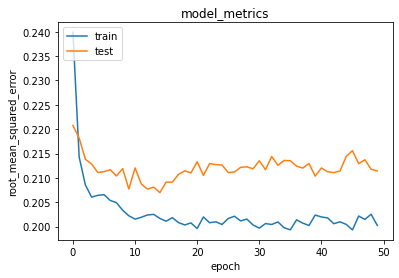

In [135]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

melakukan visualisasi pada hasil proses

In [136]:
film_df = filmBaru
df = pd.read_csv('ratings.csv')
user_id = df.userId.sample(1).iloc[0]
film_watched_by_user = df[df.userId == user_id]
film_not_watched = film_df[~film_df['id'].isin(film_watched_by_user.movieId.values)]['id'] 
film_not_watched = list(
    set(film_not_watched)
    .intersection(set(film_to_film_encoded.keys()))
)
film_not_watched = [[film_to_film_encoded.get(x)] for x in film_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_film_array = np.hstack(
    ([[user_encoder]] * len(film_not_watched), film_not_watched)
)

mendapatakn rekomendasi move berdasarkan rating 

In [137]:
ratings = model.predict(user_film_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_film_ids = [
    film_encoded_to_film.get(film_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_film_user = (
    film_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
film_df_rows = film_df[film_df['id'].isin(top_film_user)]
for row in film_df_rows.itertuples():
    print(row.title, ':', row.genre)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_film = film_df[film_df['id'].isin(recommended_film_ids)]
for row in recommended_film.itertuples():
    print(row.title, ':', row.genre)

Showing recommendations for users: 388
movie with high ratings from user
--------------------------------
Fargo (1996) : Comedy|Crime|Drama|Thriller
Aliens (1986) : Action|Adventure|Horror|Sci-Fi
--------------------------------
Top 10 movie recommendation
--------------------------------
M (1931) : Crime|Film-Noir|Thriller
Hands on a Hard Body (1996) : Comedy|Documentary
Children of Paradise (Les enfants du paradis) (1945) : Drama|Romance
Drunken Master (Jui kuen) (1978) : Action|Comedy
Gun Crazy (a.k.a. Deadly Is the Female) (1949) : Crime|Drama|Film-Noir
Revolver (2005) : Crime|Drama|Thriller
Once (2006) : Drama|Musical|Romance
Civil War, The (1990) : Documentary|War
Master, The (2012) : Drama
Creed (2015) : Drama


menggunakan fungsi model.predict() dan di proleh hasil berupa 10 rekomendasi filem berdasarkan reting 